In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Radar, FontManager, grid

In [2]:
#sb.competitions()
sb.matches(competition_id=72,season_id=107)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3904629,2023-08-16,13:00:00.000,International - Women's World Cup,2023,Australia Women's,England Women's,1,3,available,...,2023-08-30T11:17:47.551826,6,Semi-finals,Accor Stadium,Tori Penso,Tony Gustavsson,Sarina Glotzbach-Wiegman,1.1.0,2,2
1,3906390,2023-08-20,13:00:00.000,International - Women's World Cup,2023,Spain Women's,England Women's,1,0,available,...,2023-08-22T19:38:43.965521,7,Final,Accor Stadium,Tori Penso,Jorge Vilda,Sarina Glotzbach-Wiegman,1.1.0,2,2
2,3906389,2023-08-19,11:00:00.000,International - Women's World Cup,2023,Sweden Women's,Australia Women's,2,0,available,...,2023-08-29T21:19:57.035390,7,3rd Place Final,Brisbane Stadium,Cheryl Foster,Peter Gerhardsson,Tony Gustavsson,1.1.0,2,2
3,3904628,2023-08-15,11:00:00.000,International - Women's World Cup,2023,Spain Women's,Sweden Women's,2,1,available,...,2023-08-16T11:30:31.556462,6,Semi-finals,Eden Park,Edina Alves Batista,Jorge Vilda,Peter Gerhardsson,1.1.0,2,2
4,3893806,2023-07-26,10:30:00.000,International - Women's World Cup,2023,Spain Women's,Zambia Women's,5,0,available,...,2023-08-15T02:58:57.266594,2,Group Stage,Eden Park,Hyeon-Jeong Oh,Jorge Vilda,Bruce Mwape,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3893800,2023-07-24,09:00:00.000,International - Women's World Cup,2023,Italy Women's,Argentina Women's,1,0,available,...,2023-08-12T17:49:18.347307,1,Group Stage,Eden Park,Melissa Paola Borjas Pastrana,Milena Bertolini,Germán Darío Portanova,1.1.0,2,2
60,3893799,2023-07-24,11:30:00.000,International - Women's World Cup,2023,Germany Women's,Morocco Women's,6,0,available,...,2023-08-21T14:33:45.142288,1,Group Stage,AAMI Park,Tori Penso,Martina Voss-Tecklenburg,Reynald Pedros,1.1.0,2,2
61,3893796,2023-07-23,08:00:00.000,International - Women's World Cup,2023,Sweden Women's,South Africa Women's,2,1,available,...,2023-07-30T08:06:34.006738,1,Group Stage,Wellington Regional Stadium,Katja Koroleva,Peter Gerhardsson,Desiree Ellis,1.1.0,2,2
62,3893795,2023-07-22,15:00:00.000,International - Women's World Cup,2023,Denmark Women's,China PR Women's,1,0,available,...,2023-08-16T06:06:04.857484,1,Group Stage,HBF Park,Marie-Soleil Beaudoin,Lars Søndergaard,Qingxia Shui,1.1.0,2,2


In [3]:
events = sb.events(match_id=3906390)
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflect

In [4]:
events = events[ ['team','player','pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back',
       'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length',
       'pass_outswinging', 'pass_recipient', 'pass_shot_assist',
       'pass_switch', 'pass_technique', 'pass_through_ball',
       'pass_type']]
events = events[events['team'] =="Spain Women's"].reset_index()

In [5]:
events.head()

,index,team,player,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_end_location,...,pass_height,pass_inswinging,pass_length,pass_outswinging,pass_recipient,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type
0,0,Spain Women's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,Spain Women's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Spain Women's,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,Spain Women's,Olga Carmona García,NaN,-0.159913,NaN,Head,NaN,NaN,"[40.3, 8.4]",...,High Pass,NaN,9.420191,NaN,Teresa Abelleira Dueñas,NaN,NaN,NaN,NaN,Recovery
4,11,Spain Women's,Teresa Abelleira Dueñas,NaN,0.935770,NaN,Head,NaN,NaN,"[43.9, 9.1]",...,High Pass,NaN,2.360085,NaN,Jennifer Hermoso Fuentes,NaN,NaN,NaN,NaN,NaN


In [6]:
events["player"].unique()

array([nan, 'Olga  Carmona García', 'Teresa Abelleira Dueñas',
       'Jennifer Hermoso Fuentes', 'Catalina Thomas Coll Lluch',
       'Irene Paredes Hernandez', 'Laia Codina Panedas',
       'María Francesca Caldentey Oliver', 'Ona Batlle Pascual',
       'Alba María Redondo Ferrer', 'Aitana Bonmati Conca',
       'Salma Paralluelo Ayingono', 'Oihane Hernández Zurbano',
       'Ivana Andrés Sanz', 'Alexia Putellas Segura'], dtype=object)

'pass_aerial_won','pass_cross','pass_cut_back','pass_goal_assist','pass_inswinging','pass_outswinging','pass_shot_assist', 'pass_switch','pass_through_ball' shows success with true or nan

'pass_angle' pas açıları sayı ile verilmiş

'pass_body_part' çok lüzum değil belki buna göre pas başarı hesabında kullanırım

'pass_end_location' pasın gittiği yeri x y olarak veriyor (ama bu pas kalitesi ölçer mi?)

'pass_height' pasın yüksek mi alçak mı olduğunu gösteriyor

'pass_length' pasın gidiş mesafesi

'pass_recipient' pasın nereye gittiğini gösteriyor

'pass_technique' pas teknik tipi gösteriyor

'pass_type' pasın hangi amaçla atıldığını gösteriyor

In [7]:
# Alexia Putellas Segura vs Aitana Bonmati Conca

putellas = events[events["player"] == 'Alexia Putellas Segura']
bonmati = events[events["player"] == 'Aitana Bonmati Conca']

In [8]:
# Split the lists into two separate columns
putellas[['pass_end_location_x', 'pass_end_location_y']] = putellas['pass_end_location'].apply(pd.Series)
bonmati[['pass_end_location_x', 'pass_end_location_y']] = bonmati['pass_end_location'].apply(pd.Series)

# Drop the original 'Column1' if needed
putellas.drop(columns=['pass_end_location'], inplace=True),
bonmati.drop(columns=['pass_end_location'], inplace=True)

C:\Users\90530\AppData\Local\Temp\ipykernel_16604\1231761476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putellas[['pass_end_location_x', 'pass_end_location_y']] = putellas['pass_end_location'].apply(pd.Series)
C:\Users\90530\AppData\Local\Temp\ipykernel_16604\1231761476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  putellas[['pass_end_location_x', 'pass_end_location_y']] = putellas['pass_end_location'].apply(pd.Series)
C:\Users\90530\AppData\Local\Temp\ipykernel_16604\1231761476.py:3: Setting

In [9]:
# 'pass_angle' avg

print(putellas['pass_angle'].mean(),bonmati['pass_angle'].mean())

# 'pass_length' avg

print(putellas['pass_length'].mean(),bonmati['pass_length'].mean())

# 'pass_end_location_x avg

print(putellas['pass_end_location_x'].mean(), bonmati['pass_end_location_x'].mean())

# 'pass_end_location_y avg

print(putellas['pass_end_location_y'].mean(), bonmati['pass_end_location_y'].mean())

putellas_values = [0.07, 10.03, 65.96, 28.85]
bonmati_values = [-0.34, 18.79, 85, 49.88]

0.06773403124999999 -0.33821032822222225
10.029771575000002 18.784146444444442
65.9625 85.00444444444445
28.85 49.87777777777778


In [10]:
# parameter names of the statistics we want to show
params = ["Average Pass Angle",'Average Pass Length','Average Horizontal Pass End Location','Average Vertical Pass End Location']
# The lower and upper boundaries for the statistics
low =  [-1, -20, 60, 20]
high = [1, 20, 100, 60]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better=["Miscontrols"]

In [11]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [12]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

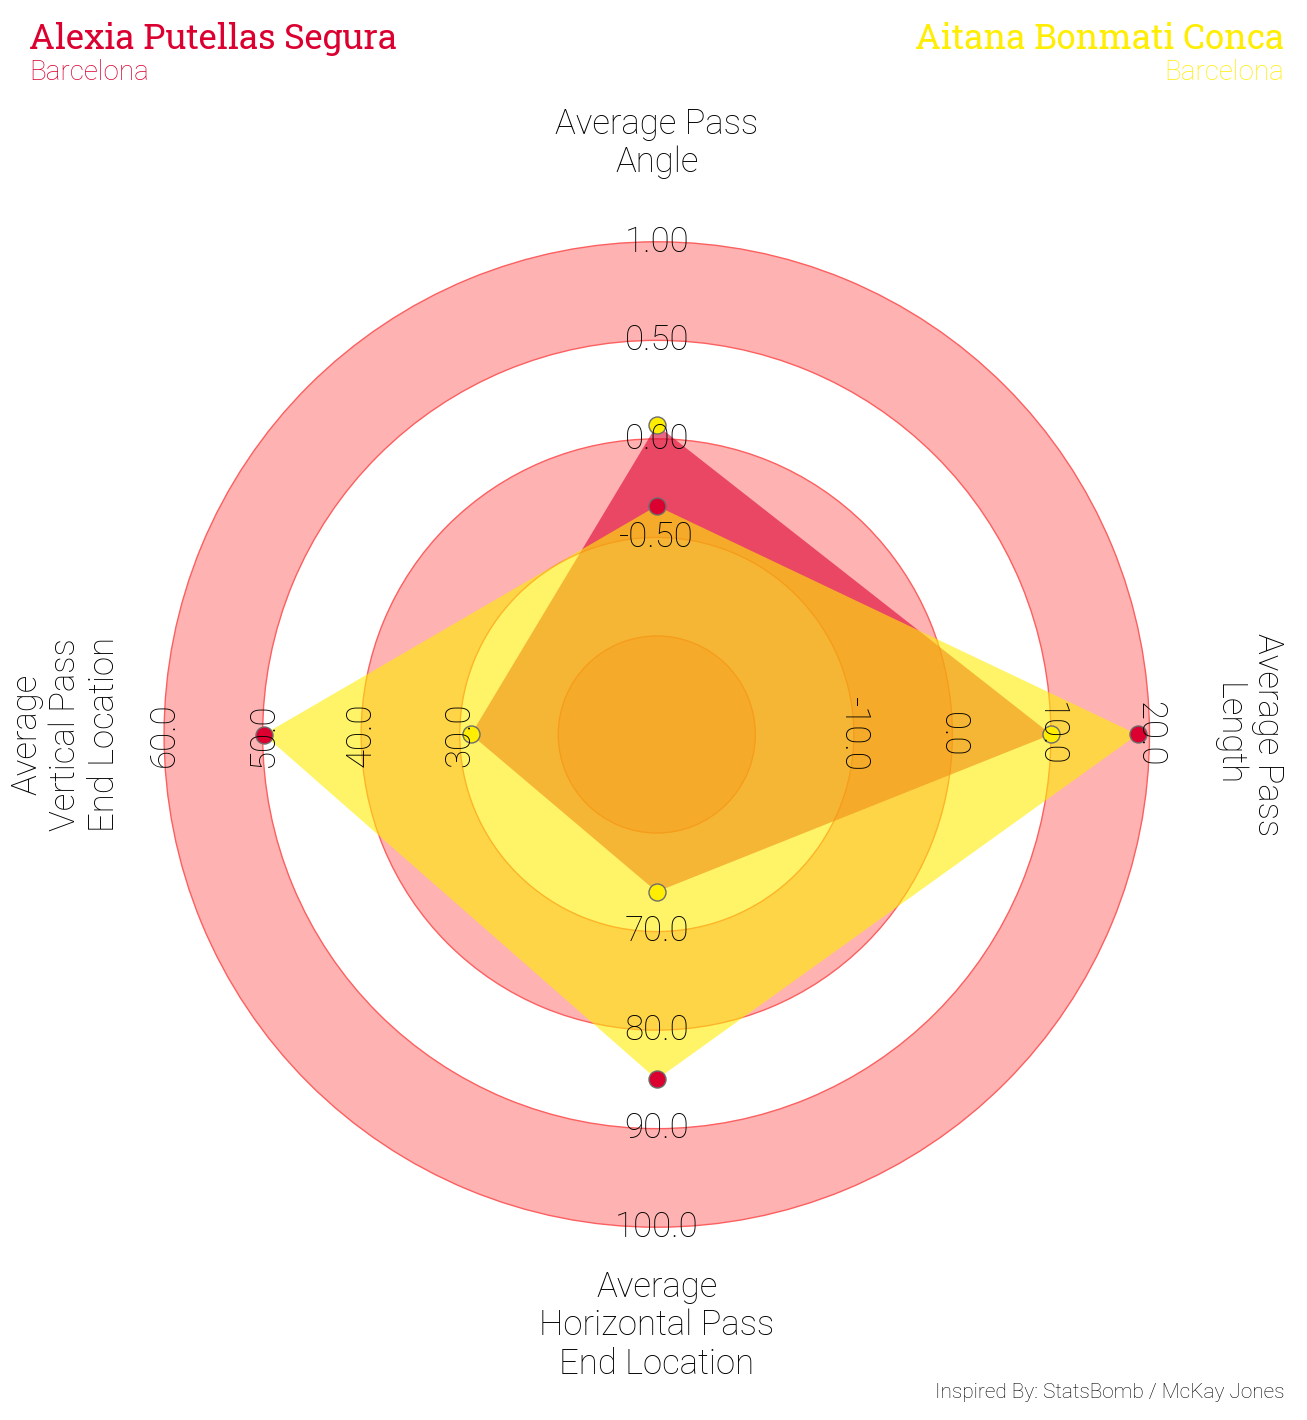

In [13]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(putellas_values, bonmati_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#DB0030', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#FFED02', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#FFED02', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#DB0030', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / McKay Jones', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Alexia Putellas Segura', fontsize=25, color='#DB0030',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Barcelona', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#DB0030')
title3_text = axs['title'].text(0.99, 0.65, 'Aitana Bonmati Conca', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#FFED02')
title4_text = axs['title'].text(0.99, 0.25, 'Barcelona', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#FFED02')


#6d6c6d